# Basics for Time Series Analysis of Groundwater Levels

---
In this notebook we will learn the basics of time series analysis for groundwater levels. It is assumed that the reader is familiar with the python programming language. For a good introduction course on python programming go to:  http://github.com/jrjohansson/scientific-python-lectures. A good introduction to Python book can be found here: http://www.greenteapress.com/thinkpython/. For a detailed theoretical explanation of time series analysis see the document `TimeSeriesBasics.pdf`.

The groundwater level of a specific site can be the result of different factors. We often talk about the groundwater level as the dependent variable and the explaining factors as the independent variables. These explaining variables can be be many, but the largest part of the variation in groundwater levels can be explained by a handfull of variables. The most important is the recharge, the amount of water that percolates to the groundwater through the unsaturated zone. The recharge on itself can be explained by the precipitation, evaporation and the transpiration. In the first model we will explore, these will be the variables that are used in trying to explain the groundwater levels. 

### Basic Time Series Model
Let us exemplify this with a simple example of a piece of land in between two canals, shown in figure 1. We are interested in the waterlevel in the borehole in the middle of the two canals. The canals both have a water level $d$ that is kept constant over time. If there is no recharge taking place, the groundwater level will be $h = d$. We therefore also call $d$ the drainage depth, the water level that is found when no recharge (or any other system excitation) takes place.

Let us now imagine a infinitely short [t] and large [L] recharge event. The effect of this recharge is a increasing groundwater level shortly after the event, followed by a slow decrease to the level is was before the event. This effect can be approximated with a gamma function, as shown by Asmuth (2012). We call this function the impulse response function, mathematically written as:

$ \theta (t) = A \frac{a^nt^{n-1}e^{\frac{-t}{a}}}{\varGamma(n)} $

However, this function is continuous in time, whereas our measurements that are used as input, can only be measured at a discrete time interval. To get a discrete version of the IRF, we first calculate the system response of a sudden and 

$ h(t) = d +  \int\limits_{-\infty}^t p(\tau)\theta(t-\tau)d\tau $

In [1]:
#Import packages for basic calculations and plotting
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc
%matplotlib inline

# Import packages for interactive plotting for increased understanding
from IPython.html.widgets import interact;
import IPython.html.widgets as widgets;

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<function __main__.impulseresponse_plot>

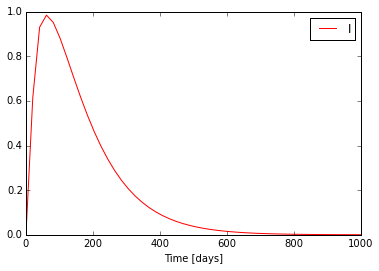

In [2]:
# Define a function that calculates and plots the impulse response function
def impulseresponse_plot(A,a,n):
    a = 1/a
    t = np.linspace(0,1000)
    Fs = A * gammainc(n,t/a) #Step Response Function
    Fb = Fs[1:] - Fs[0:-1] # Block Response Function
    Fb = np.append(0,Fb) #This is done for the visualisation, not for actual modelling!!
    plt.plot(t,Fb,'r')
    plt.xlabel('Time [days]')
    plt.ylabel('')
    plt.legend('IRF', loc = 1)
    return Fb

    
interact(impulseresponse_plot, 
        A = widgets.FloatSliderWidget(min = 0.01, max = 400, step =1, description = 'A', value = 10),
        a = widgets.FloatSliderWidget(min = 0.01, max = 1, step =0.01, value = 0.01),
        n = widgets.FloatSliderWidget(min = 0.01, max = 10, step =0.10, value = 1.5))

We have now explored the step response function, a central part of time series analysis for groundwater levels. 